# Lecture 64

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = np.arange(1,6)

f1 = sum(a)/np.sum(a**2)
f2 = 1/sum(a)

f3 = np.prod(a)/np.prod(a**2)
f4 = 1/np.prod(a)

print(f1==f2)
print(f3==f4)

False
True


# Lecture 65

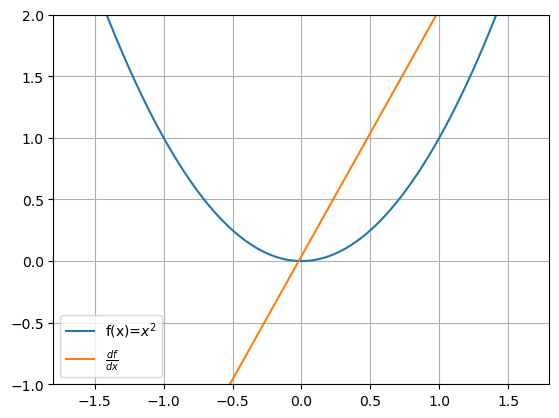

In [3]:
x = np.linspace(-2,2,101)
f = x**2
df = np.diff(f)
dx = np.diff(x)


plt.plot(x,f)
plt.plot(x[:-1],df/dx)
plt.legend(['f(x)=$x^2$', '$\\frac{df}{dx}$'])
plt.grid()
plt.xlim(-1.8,1.8)
plt.ylim(-1,2)
plt.show()

# Lecture 69: Roots of polynomials

In [4]:
import numpy as np
import sympy as sym
from IPython.display import display, Math

In [5]:
# the polynomial: 3x^2 + 2x - 1

# define the coefficients in descending order from the greatest (coefficient) to the lowest 
coefs = [3, 2, -1]

roots = np.roots(coefs)
print(roots)

[-1.          0.33333333]


In [6]:
x = sym.symbols('x')
pn = 3*x**2 + 2*x -1

# loop over the roots to check if we get the result of = 0 in all cases
for i in roots:
    display(Math('\\text{At }x=%g \\quad \\rightarrow \\quad %s = %g' %(i, sym.latex(pn), pn.subs(x,i))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Lecture 70

In [34]:
for i in range(1, 11):
    coefs = np.arange(1, i+1)
    print('A degree-{} polynomial has {} roots'.format(i-1, len(np.roots(coefs))))

A degree-0 polynomial has 0 roots
A degree-1 polynomial has 1 roots
A degree-2 polynomial has 2 roots
A degree-3 polynomial has 3 roots
A degree-4 polynomial has 4 roots
A degree-5 polynomial has 5 roots
A degree-6 polynomial has 6 roots
A degree-7 polynomial has 7 roots
A degree-8 polynomial has 8 roots
A degree-9 polynomial has 9 roots


# Lecture 71: The quadratic equation

In [7]:
import numpy as np
import scipy as sp

In [8]:
print( np.sqrt(-1) )
print( sp.sqrt(-1) ) # this one will be depreciated
print( np.lib.scimath.sqrt(-1) )

nan
1j
1j


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  


In [9]:
# function to calculate the solutions for the quadratic equation
def quadeq(a, b, c):
    
    out = np.zeros(2, dtype=complex)
    
    out[0] = ( -b + np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
    out[1] = ( -b - np.lib.scimath.sqrt(b**2 - 4*a*c)) / (2*a)
    
    return out

In [47]:
solution = quadeq(4, 7, 5)
solution

array([-0.875+0.69597055j, -0.875-0.69597055j])

## Lecture 71: exercise

In [11]:
a = 1
b = range(-5,6)
c = range(-2,11)

# we have to ignore the complex part in order to plot the image
# if we want to store the actual complex values: 
# np.zeros((len(x), len(y)), dtype=complex)

sol_matrix = np.zeros((len(b), len(c)))

In [12]:
for i in range(len(b)):
    for j in range(len(c)):
        sol_matrix[i,j] = quadeq(a,b[i],c[j])[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
import matplotlib.pyplot as plt

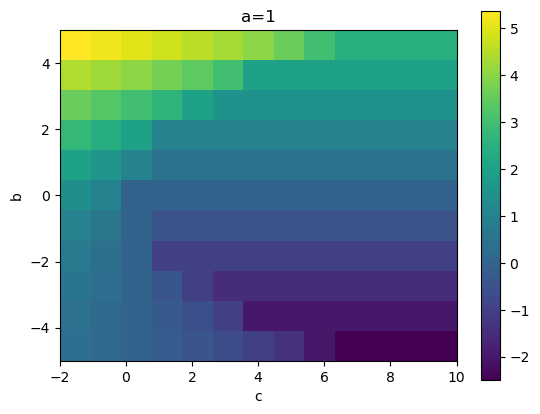

In [14]:
plt.imshow(sol_matrix, extent=[ c[0],c[-1],b[0],b[-1] ])
plt.xlabel('c')
plt.ylabel('b')
plt.title('a=' + str(a))
plt.colorbar()
plt.show()

# Lecture 72

In [15]:
import numpy as np

# we can compute the imaginary part of a number with python just typing
# the imaginary part + "j": 1j

print( 1j )
print( np.sqrt(-1) )
print( np.sqrt(-1, dtype=complex) )

1j
nan
1j


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [16]:
# we can also use the Imaginary operator using sympy
import sympy as sym

print( sym.I )

I


In [17]:
r_part = 4
i_part = -5

# np.complex is deprecated, we can use the builtin complex(real, imaginary) instead
cn = complex(r_part, i_part)
cn

(4-5j)

In [18]:
# extract the real part of a complex number
np.real(cn)

4.0

In [19]:
# extract the imaginary part of a complex number
np.imag(cn)

-5.0

## Lecture 72: exercise

In [20]:
w = complex(2,4)
z = complex(5,6)

w+z

(7+10j)

In [21]:
c_sum = complex(np.real(w) + np.real(z), np.imag(w) + np.imag(z))
c_sum

(7+10j)

In [22]:
w+z == c_sum

True

# Lecture 73

In [67]:
import numpy as np
import sympy as sym
from IPython.display import display,Math

In [41]:
z1 = complex(4,5)
z2 = complex(6,-2)

w = np.real(z1)*np.real(z2) + np.real(z1)*np.imag(z2)*1j + np.imag(z1)*1j*np.real(z2) + np.imag(z1)*1j*np.imag(z2)*1j

sym.sympify(w)
sym.sympify(z1*z2)

34.0 + 22.0*I

In [48]:
print(np.conj(z1))
print(np.conj(z2))

(4-5j)
(6+2j)


In [66]:
# Use sympy to show that z x z^* = a^2 + b^2
a,b = sym.symbols('a,b', real=True)
z = a + b*sym.I
display(Math('z \\times z^* =%s' %sym.latex(sym.expand(z * sym.conjugate(z)) )))

<IPython.core.display.Math object>

### Division with complex number 

In [69]:
z = complex(4,2)
display(Math('\\frac{%s}{2} = %s' %(z,z/2)))

<IPython.core.display.Math object>

In [82]:
z1 = complex(4,2)
z2 = complex(2,-3)

display(Math('\\frac{%s}{%s} = \\frac{%s \\times %s}{%s \\times %s} = %s' 
             %(z1,z2,
               z1,np.conj(z2), z2, np.conj(z2),
               z1/z2)
            ))

<IPython.core.display.Math object>